
# PART 2: DATA CLEANING

### Import usual libraries

In [1]:
from datetime import datetime

import geopandas as gp
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
import plotly as py 
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import os


### This part would read all the cleaned CSV files from a separate directory and concatenate all tables horizontally with common index 'Region'

In [2]:

path = r'C:\Users\Edmalyn Pacanor\Ookla Mobile Final\CSV Cleaned' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0).set_index('Region')
    li.append(df)

mobile_ookla = pd.concat(li, axis=1, ignore_index=False)


### Save checkpoint

In [30]:
mobile_ookla.to_csv("concatenated 2019-2020.csv")

In [3]:
mobile_ookla

,Tests (Q1-2019),Devices (Q1-2019),Ave Latency(ms) (Q1-2019),Ave Download(Mbps) (Q1-2019),Ave Upload(Mbps) (Q1-2019),Tests (Q1-2020),Devices (Q1-2020),Ave Latency(ms) (Q1-2020),Ave Download(Mbps) (Q1-2020),Ave Upload(Mbps) (Q1-2020),...,Tests (Q4-2019),Devices (Q4-2019),Ave Latency(ms) (Q4-2019),Ave Download(Mbps) (Q4-2019),Ave Upload(Mbps) (Q4-2019),Tests (Q4-2020),Devices (Q4-2020),Ave Latency(ms) (Q4-2020),Ave Download(Mbps) (Q4-2020),Ave Upload(Mbps) (Q4-2020)
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,1295,493,78.089362,9.425894,5.965306,3165,917,60.174263,8.484839,6.126777,...,2013,706,68.943709,8.977278,6.076411,7692,2318,57.160615,7.108765,5.169553
CAR,3859,2048,68.593258,9.801103,5.639625,6241,2983,51.034591,10.762159,6.035094,...,4779,2766,48.615101,12.919834,6.868661,10623,4184,45.540373,8.091913,4.459382
NCR,114782,58942,45.545124,18.043558,7.663277,186271,85129,32.774387,19.723741,6.605460,...,129214,72121,35.025286,22.680549,7.957683,285695,117799,24.708185,28.887553,6.562790
Region I,7871,4058,60.132345,12.059348,6.199840,13920,6130,42.431923,11.884861,6.198092,...,9902,5362,46.726946,15.308816,7.748805,23843,9585,33.952587,12.259604,4.932170
Region II,4023,2062,65.253389,11.184127,5.790260,6598,3216,42.239628,13.033006,6.630197,...,4973,2687,57.442228,15.652032,8.374384,15396,6305,38.583815,10.890773,5.177189
Region III,30432,16175,57.798584,13.126023,6.716969,57651,24935,45.033558,12.656666,6.277600,...,36976,19980,47.626112,16.241158,7.947769,104467,42178,32.145979,14.219295,5.146316
Region IV-A,45180,22877,55.917223,12.265577,6.333098,90533,36087,44.157556,12.793386,5.971780,...,54371,28281,46.228031,15.788708,7.270606,170788,68019,34.004543,14.223361,4.909055
Region IV-B,2833,1174,64.475046,10.792100,5.329701,5195,1949,57.045894,12.005827,7.411930,...,2929,1564,47.978528,12.908262,7.375350,11018,3847,39.927649,10.162448,5.668466
Region IX,2527,1224,69.071560,12.498095,6.725895,4825,2175,46.782178,13.000708,7.308969,...,3861,1876,65.468278,13.582476,7.117621,12194,4020,46.117424,10.746596,6.254332


### Checking for Null Values

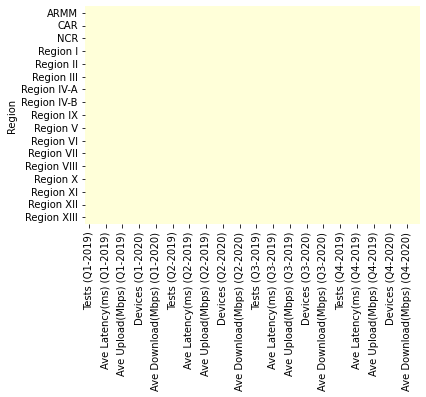

In [4]:
sns.heatmap(mobile_ookla.isnull(),cbar=False,cmap='YlGnBu')   
plt.show()

### Read the file containing the information for number of Towers per Region. Source: FOI.gov.ph, National Telecommunications Commission

In [5]:
towers = pd.read_csv("Towers.csv")
print(towers.dtypes)
print(towers)

Region        object
Smart 2019     int64
Smart 2020     int64
Globe 2019     int64
Globe 2020     int64
dtype: object
         Region  Smart 2019  Smart 2020  Globe 2019  Globe 2020
0           NCR        6270        6973        2561        3746
1           CAR         493         545         253         337
2      Region I        1287        1420         691        1100
3     Region II         699         822         480         773
4    Region III        2914        3588        1094        1506
5   Region IV-A        3566        4277        1882        2496
6   Region IV-B         494         606         665         767
7      Region V         779         950         574         738
8     Region VI        1585        1934         714        1126
9    Region VII        1578        1829        1036        1261
10  Region VIII         648         723         435         563
11    Region IX         623         714         378         521
12     Region X         902        1025         5

### Merge the cleaned Ookla data with the NTC Data based on 'Region' column and save the new DataFrame in a new placeholder and round the decimal points of the floats to 2 decimal values.

In [6]:
phooklatower = pd.merge(mobile_ookla,towers, on="Region", how="inner")
phooklatower.round(2)

,Region,Tests (Q1-2019),Devices (Q1-2019),Ave Latency(ms) (Q1-2019),Ave Download(Mbps) (Q1-2019),Ave Upload(Mbps) (Q1-2019),Tests (Q1-2020),Devices (Q1-2020),Ave Latency(ms) (Q1-2020),Ave Download(Mbps) (Q1-2020),...,Ave Upload(Mbps) (Q4-2019),Tests (Q4-2020),Devices (Q4-2020),Ave Latency(ms) (Q4-2020),Ave Download(Mbps) (Q4-2020),Ave Upload(Mbps) (Q4-2020),Smart 2019,Smart 2020,Globe 2019,Globe 2020
0,ARMM,1295,493,78.09,9.43,5.97,3165,917,60.17,8.48,...,6.08,7692,2318,57.16,7.11,5.17,82,88,190,258
1,CAR,3859,2048,68.59,9.80,5.64,6241,2983,51.03,10.76,...,6.87,10623,4184,45.54,8.09,4.46,493,545,253,337
2,NCR,114782,58942,45.55,18.04,7.66,186271,85129,32.77,19.72,...,7.96,285695,117799,24.71,28.89,6.56,6270,6973,2561,3746
3,Region I,7871,4058,60.13,12.06,6.20,13920,6130,42.43,11.88,...,7.75,23843,9585,33.95,12.26,4.93,1287,1420,691,1100
4,Region II,4023,2062,65.25,11.18,5.79,6598,3216,42.24,13.03,...,8.37,15396,6305,38.58,10.89,5.18,699,822,480,773
5,Region III,30432,16175,57.80,13.13,6.72,57651,24935,45.03,12.66,...,7.95,104467,42178,32.15,14.22,5.15,2914,3588,1094,1506
6,Region IV-A,45180,22877,55.92,12.27,6.33,90533,36087,44.16,12.79,...,7.27,170788,68019,34.00,14.22,4.91,3566,4277,1882,2496
7,Region IV-B,2833,1174,64.48,10.79,5.33,5195,1949,57.05,12.01,...,7.38,11018,3847,39.93,10.16,5.67,494,606,665,767
8,Region IX,2527,1224,69.07,12.50,6.73,4825,2175,46.78,13.00,...,7.12,12194,4020,46.12,10.75,6.25,623,714,378,521
9,Region V,5021,2388,71.69,10.74,4.93,10020,4246,53.56,9.99,...,7.24,24125,9561,42.82,10.43,5.58,779,950,574,738


### Next read the file containing the data on Total Population per region, Level of Urbanization, Daily Minimum Wage and Surface Area per regions of the Philippines. Source: Philippine Statistics Authority and Department of Environment and Natural Resources

In [7]:
pop = pd.read_csv("Population.csv")
print(pop.dtypes)
print(pop)

Region                              object
Total Population as of May 2020      int64
Level of Urbanization (%)          float64
Daily Minimum Wage (Php)             int64
Surface Area (km^2)                float64
dtype: object
         Region  Total Population as of May 2020  Level of Urbanization (%)  \
0           NCR                         13484462                      100.0   
1           CAR                          1797660                       26.3   
2      Region I                          5301139                       12.7   
3     Region II                          3685744                       11.6   
4    Region III                         12422172                       51.6   
5   Region IV-A                         16195042                       59.7   
6   Region IV-B                          3228558                       22.3   
7      Region V                          6082165                       15.3   
8     Region VI                          7954723            

### Similar to the previous step, merge this DataFrame to our Ookla+Towers data. This is the final cleaned data to be used for data analyzation.

In [8]:
data = pd.merge(phooklatower,pop, on="Region", how="inner")
data

,Region,Tests (Q1-2019),Devices (Q1-2019),Ave Latency(ms) (Q1-2019),Ave Download(Mbps) (Q1-2019),Ave Upload(Mbps) (Q1-2019),Tests (Q1-2020),Devices (Q1-2020),Ave Latency(ms) (Q1-2020),Ave Download(Mbps) (Q1-2020),...,Ave Download(Mbps) (Q4-2020),Ave Upload(Mbps) (Q4-2020),Smart 2019,Smart 2020,Globe 2019,Globe 2020,Total Population as of May 2020,Level of Urbanization (%),Daily Minimum Wage (Php),Surface Area (km^2)
0,ARMM,1295,493,78.089362,9.425894,5.965306,3165,917,60.174263,8.484839,...,7.108765,5.169553,82,88,190,258,4404288,13.7,325,12535.79
1,CAR,3859,2048,68.593258,9.801103,5.639625,6241,2983,51.034591,10.762159,...,8.091913,4.459382,493,545,253,337,1797660,26.3,350,19422.03
2,NCR,114782,58942,45.545124,18.043558,7.663277,186271,85129,32.774387,19.723741,...,28.887553,6.562790,6270,6973,2561,3746,13484462,100.0,537,619.57
3,Region I,7871,4058,60.132345,12.059348,6.199840,13920,6130,42.431923,11.884861,...,12.259604,4.932170,1287,1420,691,1100,5301139,12.7,340,13012.60
4,Region II,4023,2062,65.253389,11.184127,5.790260,6598,3216,42.239628,13.033006,...,10.890773,5.177189,699,822,480,773,3685744,11.6,370,28228.83
5,Region III,30432,16175,57.798584,13.126023,6.716969,57651,24935,45.033558,12.656666,...,14.219295,5.146316,2914,3588,1094,1506,12422172,51.6,420,22014.63
6,Region IV-A,45180,22877,55.917223,12.265577,6.333098,90533,36087,44.157556,12.793386,...,14.223361,4.909055,3566,4277,1882,2496,16195042,59.7,400,16873.31
7,Region IV-B,2833,1174,64.475046,10.792100,5.329701,5195,1949,57.045894,12.005827,...,10.162448,5.668466,494,606,665,767,3228558,22.3,320,29620.90
8,Region IX,2527,1224,69.071560,12.498095,6.725895,4825,2175,46.782178,13.000708,...,10.746596,6.254332,623,714,378,521,3875576,33.9,316,17056.73
9,Region V,5021,2388,71.686747,10.744129,4.928772,10020,4246,53.556250,9.992012,...,10.425221,5.576936,779,950,574,738,6082165,15.3,310,18155.82


### Check for the data types of each columns. 

In [9]:
data.dtypes

Region                              object
Tests (Q1-2019)                      int64
Devices (Q1-2019)                    int64
Ave Latency(ms) (Q1-2019)          float64
Ave Download(Mbps) (Q1-2019)       float64
Ave Upload(Mbps) (Q1-2019)         float64
Tests (Q1-2020)                      int64
Devices (Q1-2020)                    int64
Ave Latency(ms) (Q1-2020)          float64
Ave Download(Mbps) (Q1-2020)       float64
Ave Upload(Mbps) (Q1-2020)         float64
Tests (Q2-2019)                      int64
Devices (Q2-2019)                    int64
Ave Latency(ms) (Q2-2019)          float64
Ave Download(Mbps) (Q2-2019)       float64
Ave Upload(Mbps) (Q2-2019)         float64
Tests (Q2-2020)                      int64
Devices (Q2-2020)                    int64
Ave Latency(ms) (Q2-2020)          float64
Ave Download(Mbps) (Q2-2020)       float64
Ave Upload(Mbps) (Q2-2020)         float64
Tests (Q3-2019)                      int64
Devices (Q3-2019)                    int64
Ave Latency

### Check again for null values. Seeing that the heatmap shows no null values, we can now proceed to our next step, data analyzation.

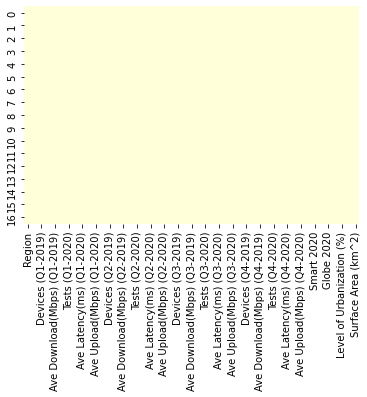

In [10]:
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')   
plt.show()

### Save the final cleaned data to a new CSV.

In [11]:
data.to_csv("final data for clustering.csv")

### We also wanted to see the overview of Internet Speeds per Region. We plotted the download speeds per quarter for separate years. This is without consideration yet of the other factors. These plots show that there is an evident inequality in the different regions of the Philippines

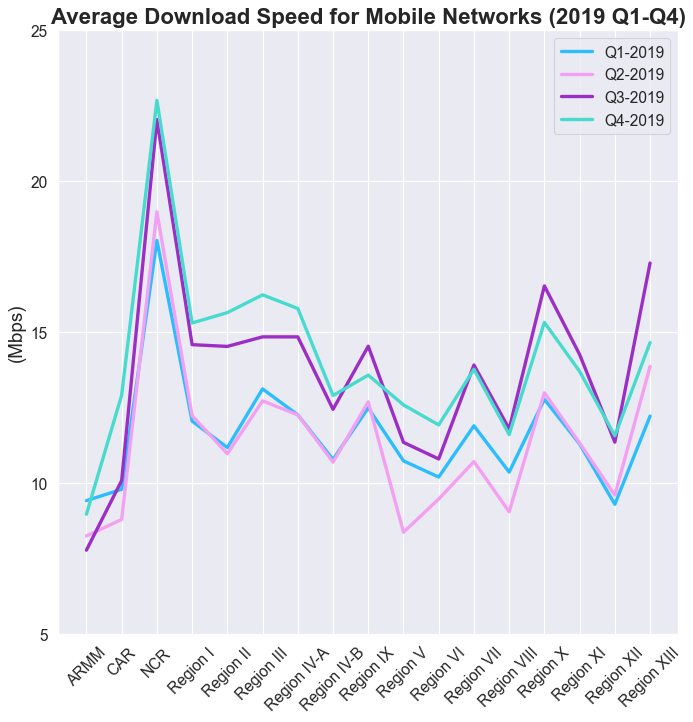

In [40]:
data

sns.set(style='dark', palette=('flare'))
ax1 = plt.figure(figsize=(10,10), dpi=80)
plt.title('Average Download Speed for Mobile Networks (2019 Q1-Q4)', fontdict={'fontname':'Arial','fontweight': 'bold', 'fontsize':20})
plt.plot(data.Region, data['Ave Download(Mbps) (Q1-2019)'], label='Q1-2019', color='#2CBDFE', linewidth=3)
plt.plot(data.Region, data['Ave Download(Mbps) (Q2-2019)'], label='Q2-2019', color='#F3A0F2', linewidth=3)
plt.plot(data.Region, data['Ave Download(Mbps) (Q3-2019)'], label='Q3-2019', color='#9D2EC5', linewidth=3)
plt.plot(data.Region, data['Ave Download(Mbps) (Q4-2019)'], label='Q4-2019', color='#47DBCD', linewidth=3)
plt.xticks(fontsize=14, rotation=45)
plt.yticks([5,10,15,20,25],fontsize=14)
plt.legend(fontsize=14)
#plt.xlabel('Regions', fontdict={'fontname':'Arial','fontsize':17})
plt.ylabel('(Mbps)', fontsize=17, rotation=90)
plt.grid()
plt.show()


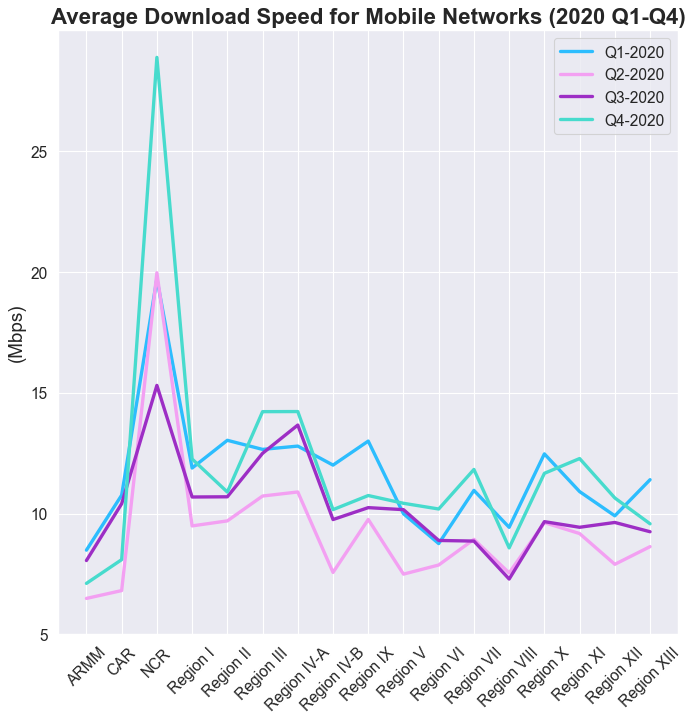

In [41]:
ax2 = plt.figure(figsize=(10,10), dpi=80)
plt.title('Average Download Speed for Mobile Networks (2020 Q1-Q4)', fontdict={'fontname':'Arial','fontweight': 'bold', 'fontsize':20})
plt.plot(data.Region, data['Ave Download(Mbps) (Q1-2020)'], label='Q1-2020', color='#2CBDFE', linewidth=3)
plt.plot(data.Region, data['Ave Download(Mbps) (Q2-2020)'], label='Q2-2020', color='#F3A0F2', linewidth=3)
plt.plot(data.Region, data['Ave Download(Mbps) (Q3-2020)'], label='Q3-2020', color='#9D2EC5', linewidth=3)
plt.plot(data.Region, data['Ave Download(Mbps) (Q4-2020)'], label='Q4-2020', color='#47DBCD', linewidth=3)
plt.xticks(fontsize=14, rotation=45)
plt.yticks([5,10,15,20,25],fontsize=14)
plt.legend(fontsize=14)
#plt.xlabel('Regions', fontdict={'fontname':'Arial','fontsize':17})
plt.ylabel('(Mbps)', fontsize=17, rotation=90)
plt.grid()
plt.show()


### Next step would be applying dimension reduction using PCA and K-means. This will be done in a seperate notebook.